
# **Overview:**
This dataset captures comprehensive metrics and demographics related to player behavior in online gaming environments. It includes variables such as player demographics, game-specific details, engagement metrics, and a target variable reflecting player retention.

# **Features:**
PlayerID: Unique identifier for each player.

Age: Age of the player.

Gender: Gender of the player.

Location: Geographic location of the player.

GameGenre: Genre of the game the player is engaged in.

PlayTimeHours: Average hours spent playing per session.

InGamePurchases: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).

GameDifficulty: Difficulty level of the game.

SessionsPerWeek: Number of gaming sessions per week.

AvgSessionDurationMinutes: Average duration of each gaming session in minutes.

PlayerLevel: Current level of the player in the game.

AchievementsUnlocked: Number of achievements unlocked by the player.

EngagementLevel: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').

# **Target Variable:**

EngagementLevel: Indicates the level of player engagement categorized as 'High', 'Medium', or 'Low'.

# **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

In [2]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')

# **EDA**

In [3]:
df.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

In [4]:
df.shape

(40034, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [6]:
df.describe()

PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000                  52.000000     25.000000   
50%           9.000000                  95.000000     49.000000   
75%          14.000000                 137.000000     74.000000   
max          19.000000                 179.000000     99.000000   

       AchievementsUnlocked  
count          40034.000000  
mean              24.526477  
std               14.430726  
min                0.000000  
25%               12.000000  
50%               25.000000  
75%               37.000000  
max               49.000000

In [7]:
cleaner.data_info(df)

Col    dtype  n_uniques  n_nan  \
0                    PlayerID    int64      40034      0   
1                         Age    int64         35      0   
2                      Gender   object          2      0   
3                    Location   object          4      0   
4                   GameGenre   object          5      0   
5               PlayTimeHours  float64      40034      0   
6             InGamePurchases    int64          2      0   
7              GameDifficulty   object          3      0   
8             SessionsPerWeek    int64         20      0   
9   AvgSessionDurationMinutes    int64        170      0   
10                PlayerLevel    int64         99      0   
11       AchievementsUnlocked    int64         50      0   
12            EngagementLevel   object          3      0   

                                           unique_val  duplicated  
0   [49033, 9000, 49017, 49016, 49015, 49014, 4901...           0  
1            [31, 37, 27, 40, 42, 29, 43, 18, 44, 32]           0  
2                                      [Male, Female]           0  
3                          [USA, Europe, Asia, Other]           0  
4         [Sports, Action, Strategy, Simulation, RPG]           0  
5   [10.083803582242297, 16.271118760553215, 20.14...           0  
6                                              [0, 1]           0  
7                                [Easy, Medium, Hard]           0  
8                  [7, 4, 12, 5, 19, 3, 2, 16, 18, 6]           0  
9         [57, 138, 45, 152, 99, 63, 95, 51, 156, 29]           0  
10           [14, 16, 19, 36, 48, 42, 11, 51, 31, 15]           0  
11             [32, 18, 39, 8, 48, 40, 21, 22, 3, 36]           0  
12                                [Medium, High, Low]           0

In [8]:
df.drop('PlayerID',axis=1,inplace=True)

In [9]:
df.isnull().sum()

Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

# **Pie plot for value counts of Engagement Levels**

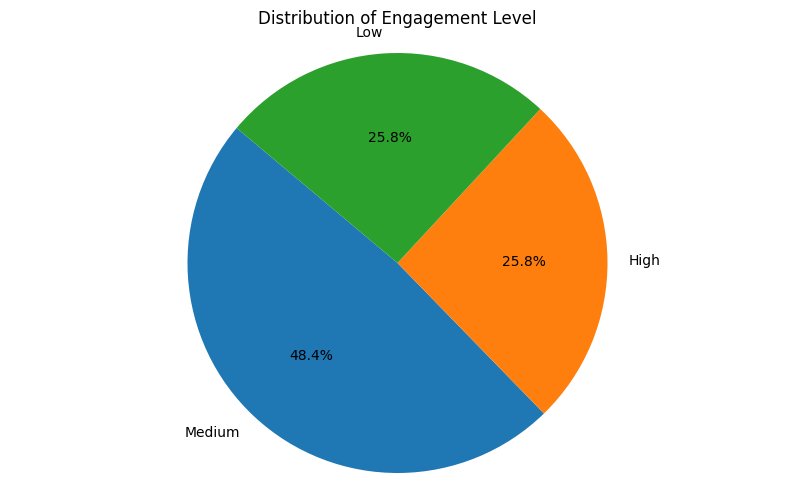

In [11]:
engagement_level = df['EngagementLevel'].value_counts()
# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(engagement_level, labels=engagement_level.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Engagement Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **Count Plots for categorical features**

Column 'Age' is not categorical.
Column 'PlayTimeHours' is not categorical.
Column 'SessionsPerWeek' is not categorical.
Column 'AvgSessionDurationMinutes' is not categorical.
Column 'PlayerLevel' is not categorical.
Column 'AchievementsUnlocked' is not categorical.


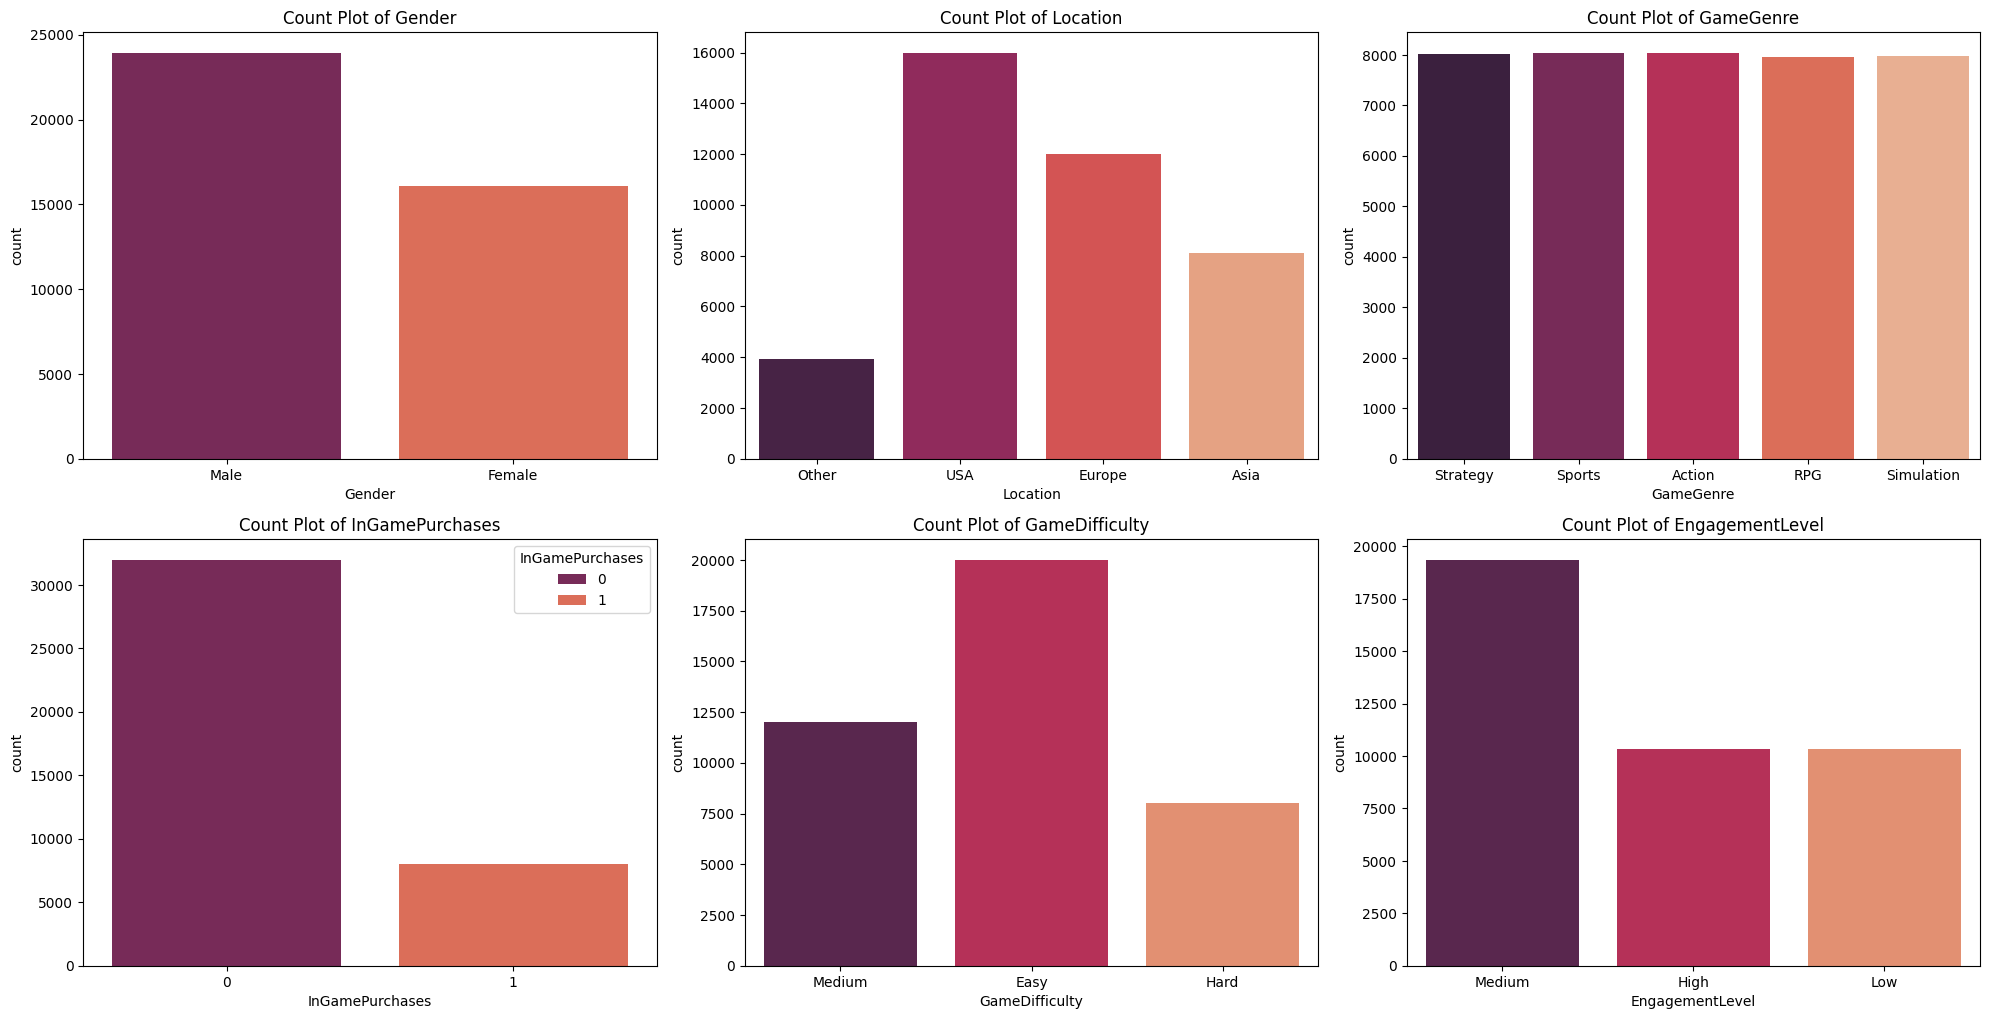

In [12]:
cleaner.categorical_plot(df,df.columns,5)

# **Box Plot for Numerical Features**

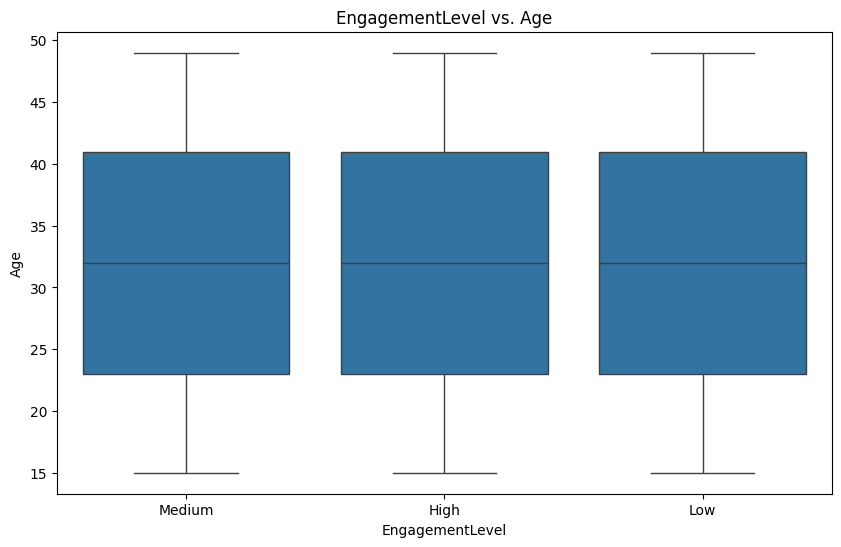

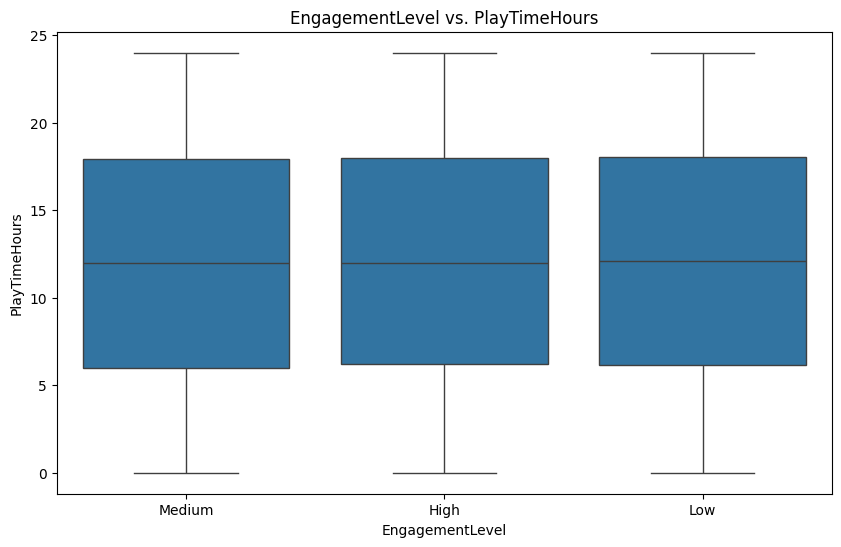

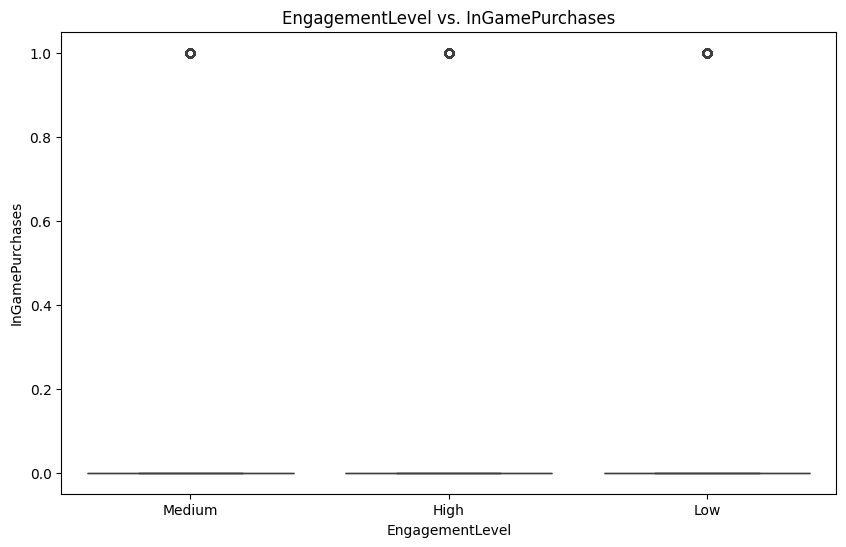

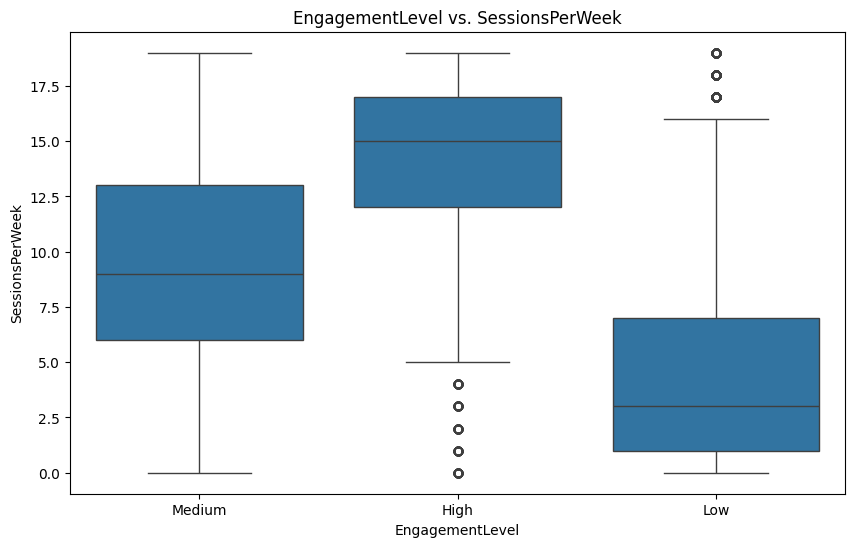

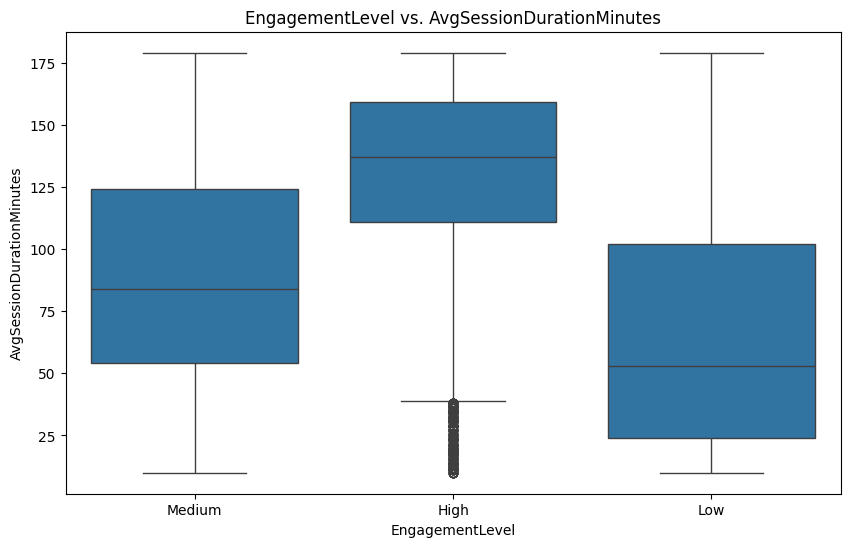

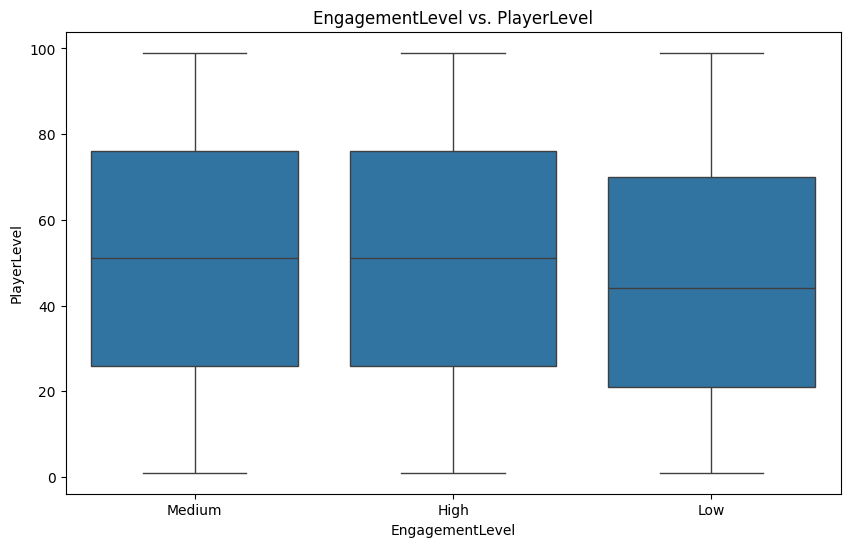

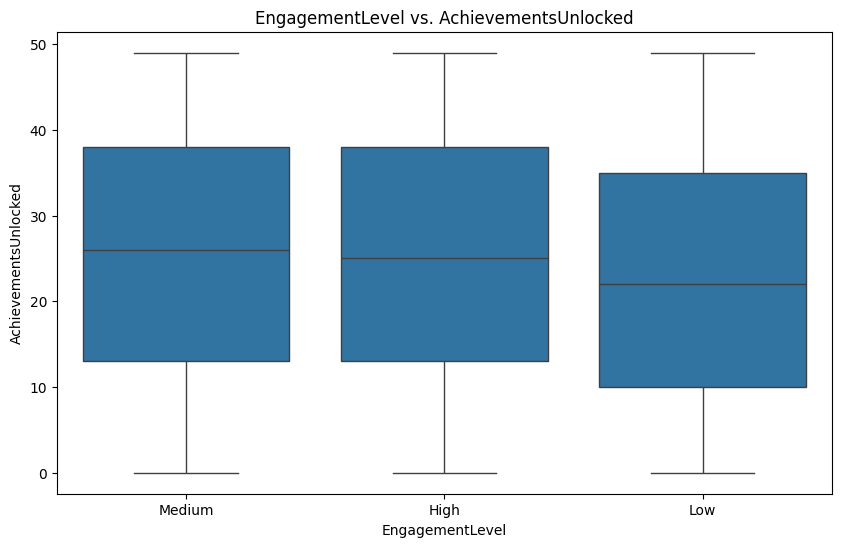

In [13]:
# List of features to analyze
numerical_features =df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
# Bivariate Analysis for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='EngagementLevel', y=feature, data=df)
    plt.title(f'EngagementLevel vs. {feature}')
    plt.show()

# **Count Plot for EngagementLevel distribution by Categorical Features**

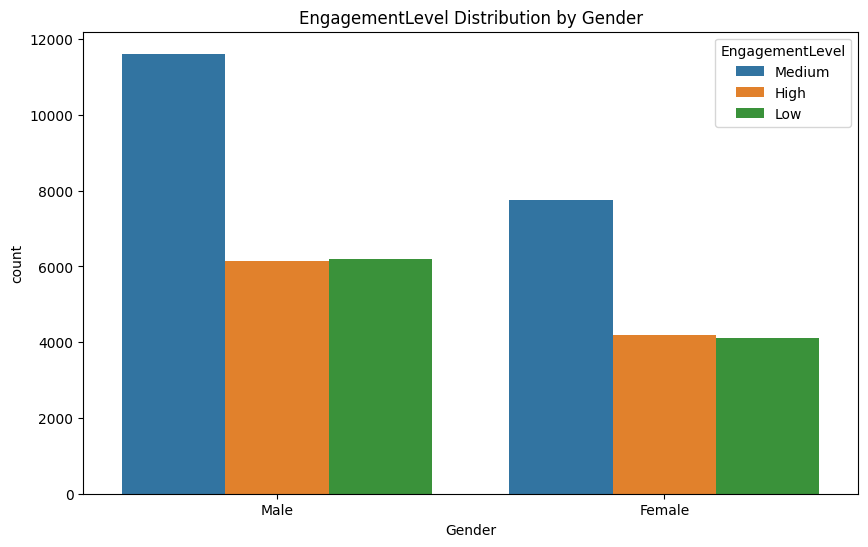

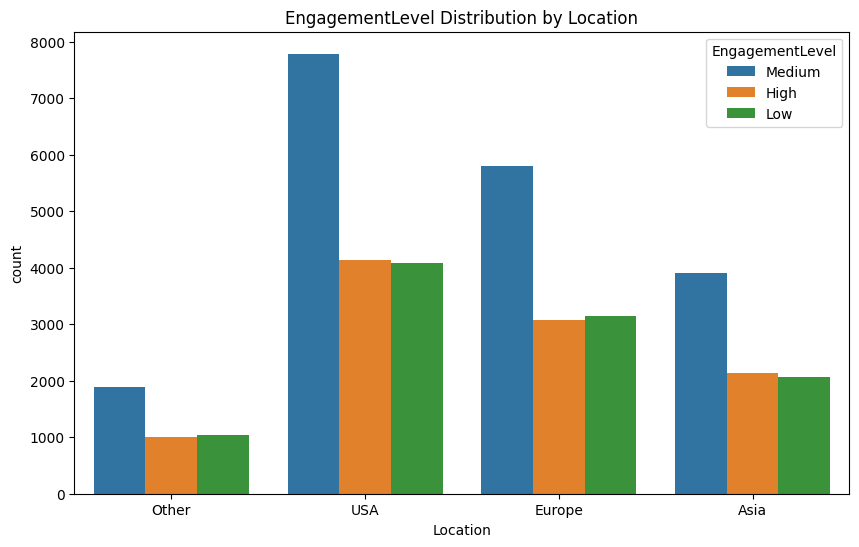

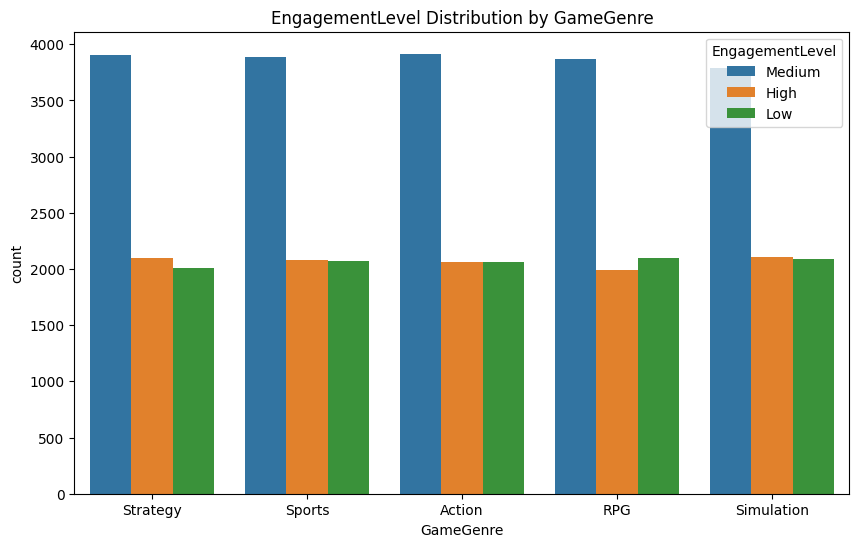

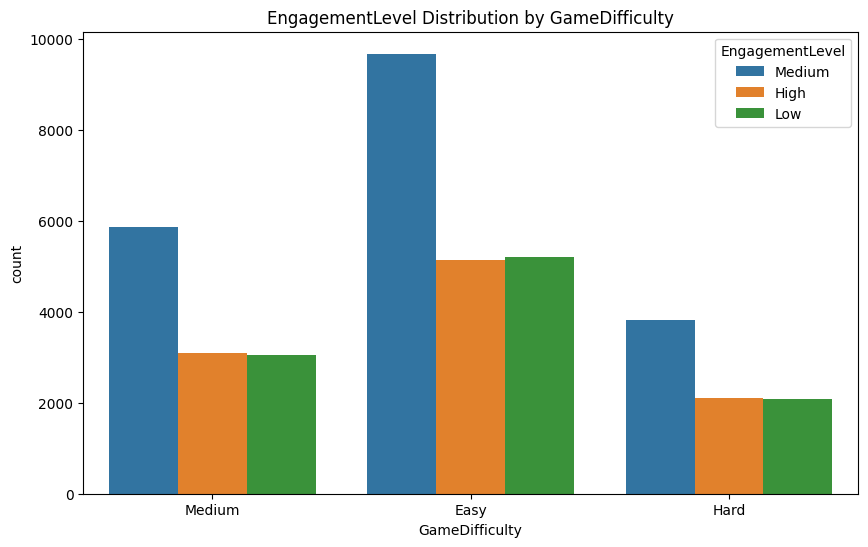

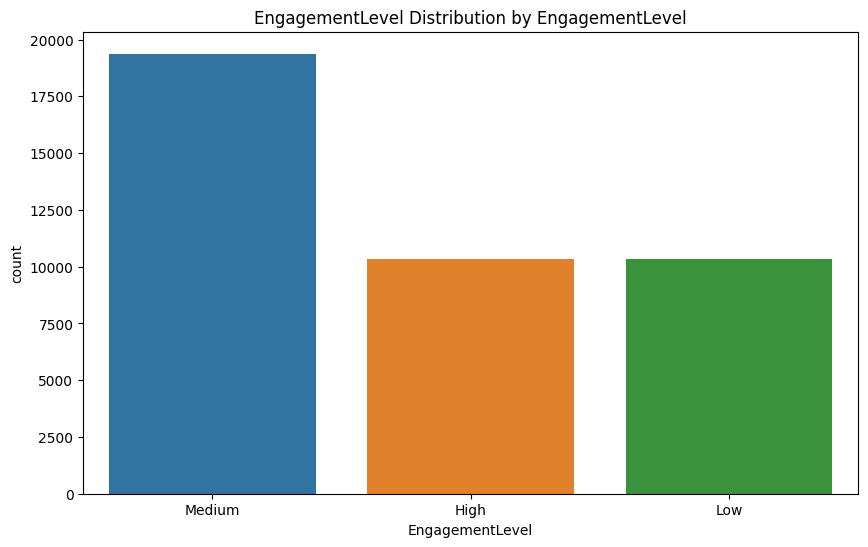

In [14]:
# Bivariate Analysis for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='EngagementLevel', data=df)
    plt.title(f'EngagementLevel Distribution by {feature}')
    plt.show()

# **Nothing is skewed, InGamePurchases is categorical**

In [15]:
df.skew(numeric_only=True)

Age                         -0.004466
PlayTimeHours               -0.002225
InGamePurchases              1.493398
SessionsPerWeek              0.015517
AvgSessionDurationMinutes   -0.005632
PlayerLevel                  0.018754
AchievementsUnlocked        -0.005136
dtype: float64

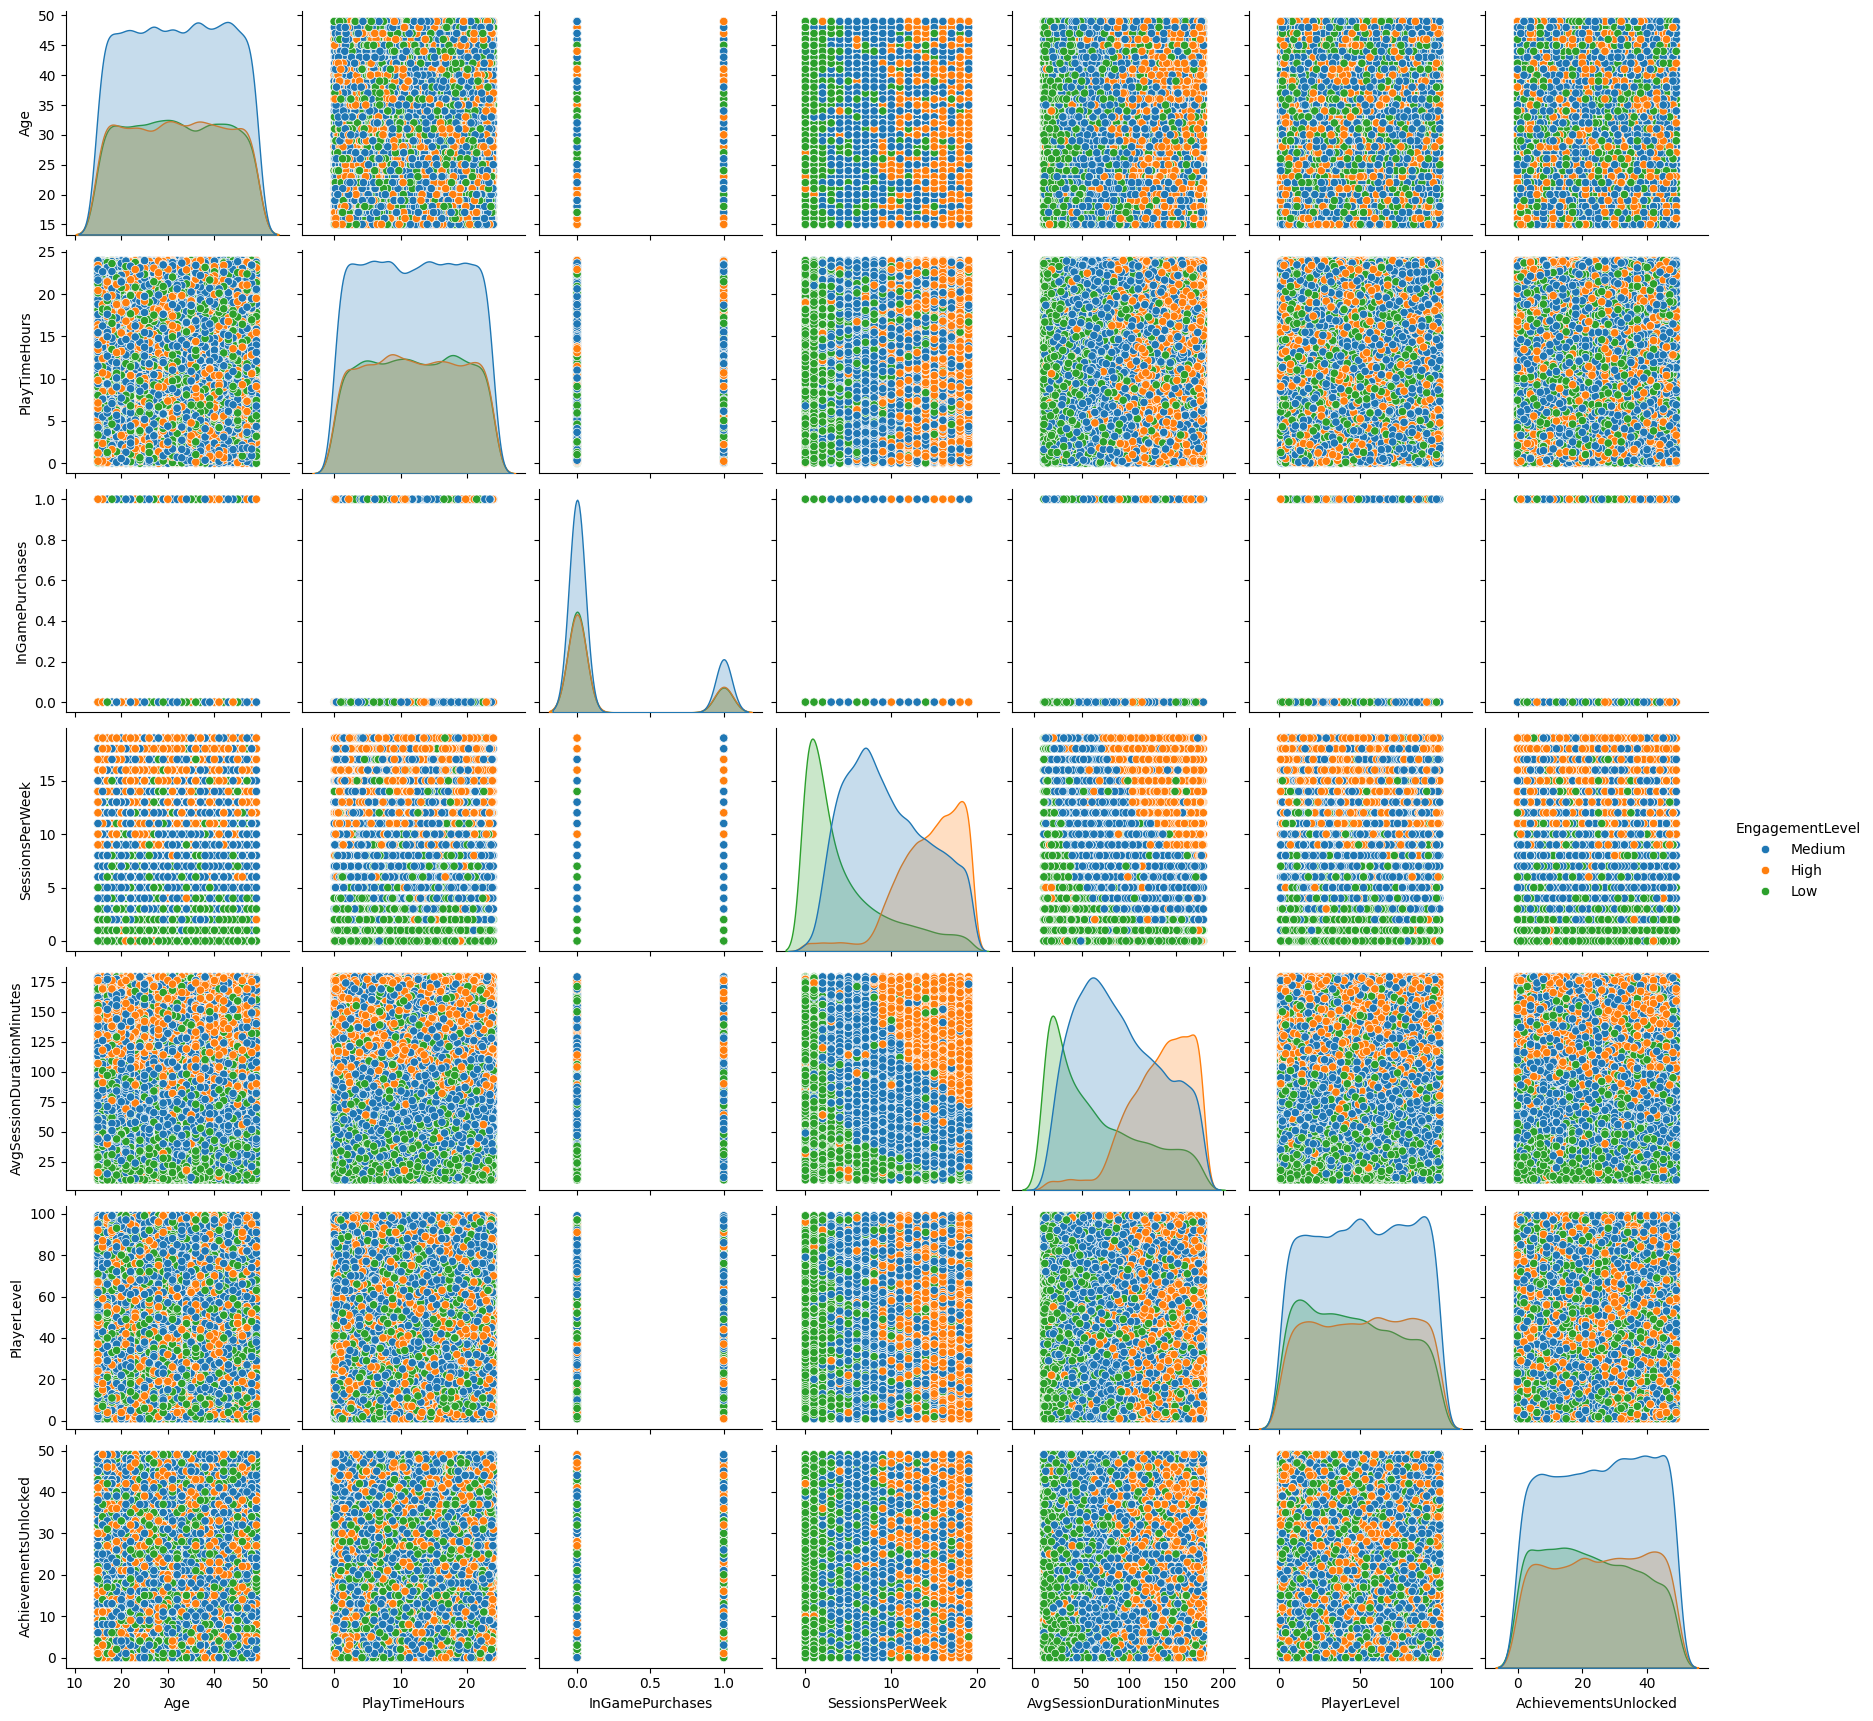

In [16]:
sns.pairplot(df, hue='EngagementLevel')
plt.show()

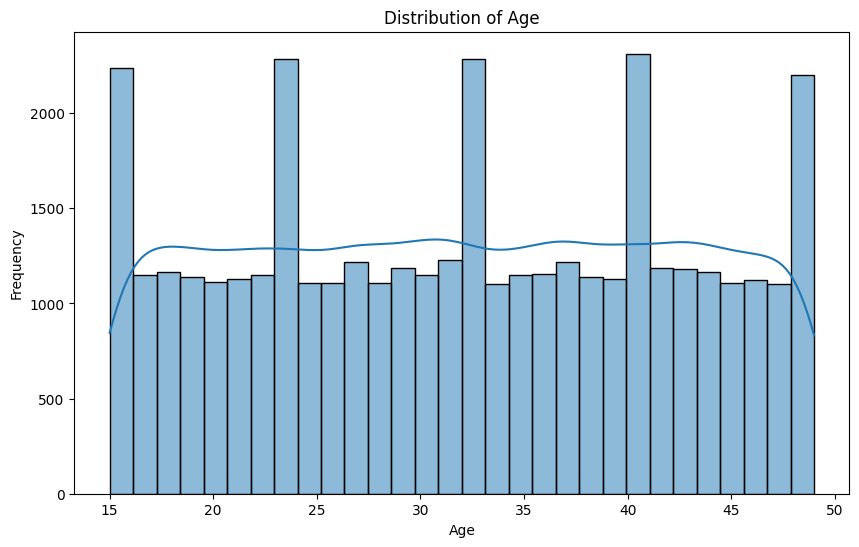

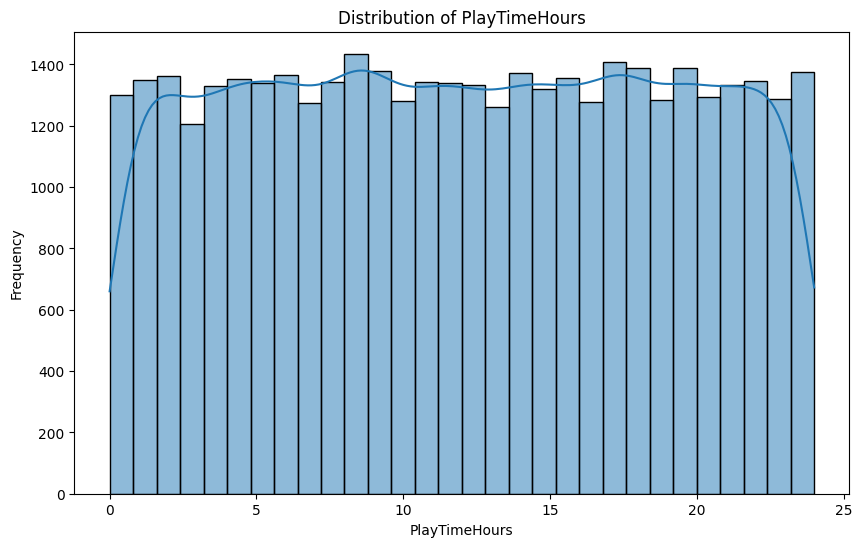

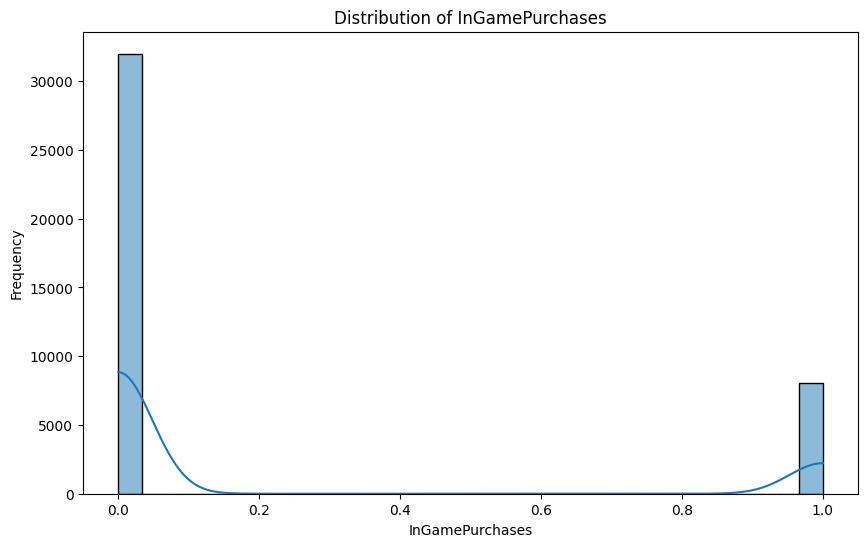

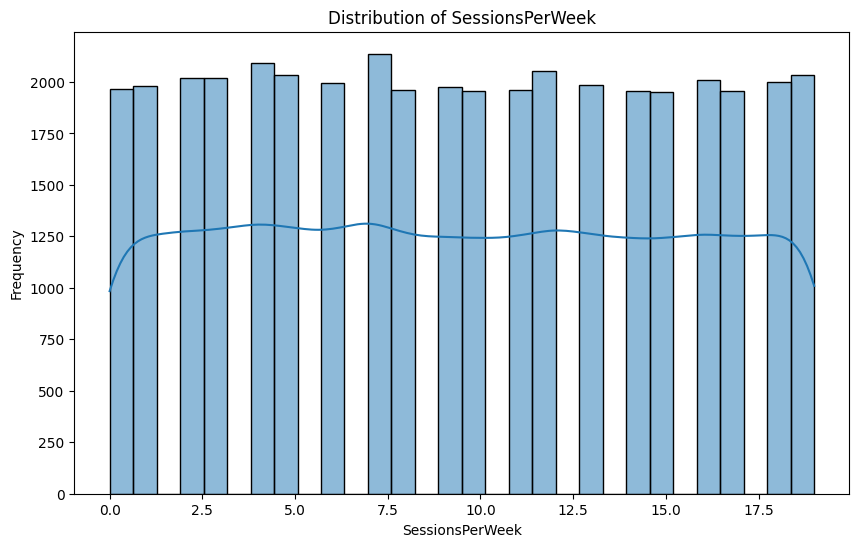

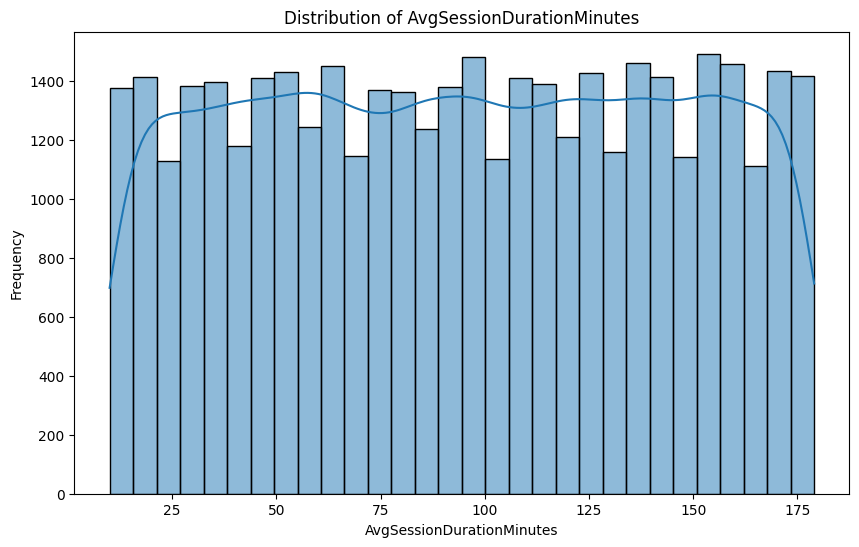

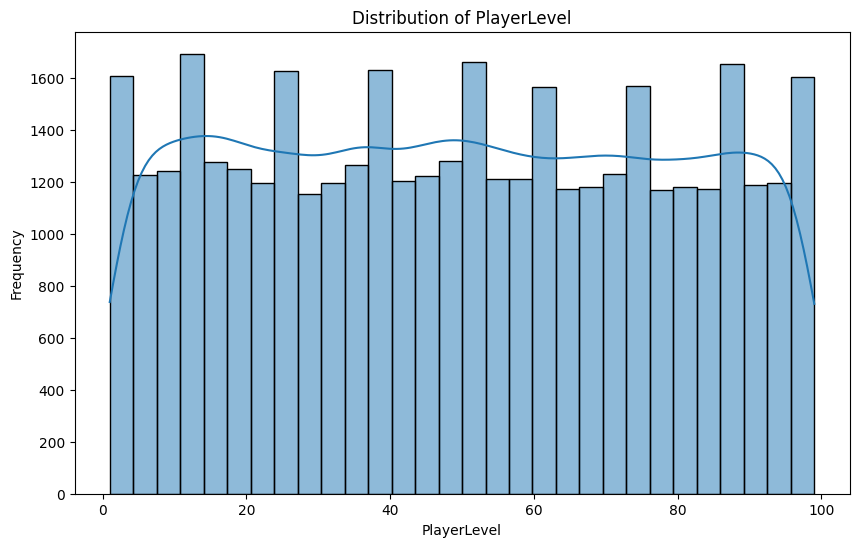

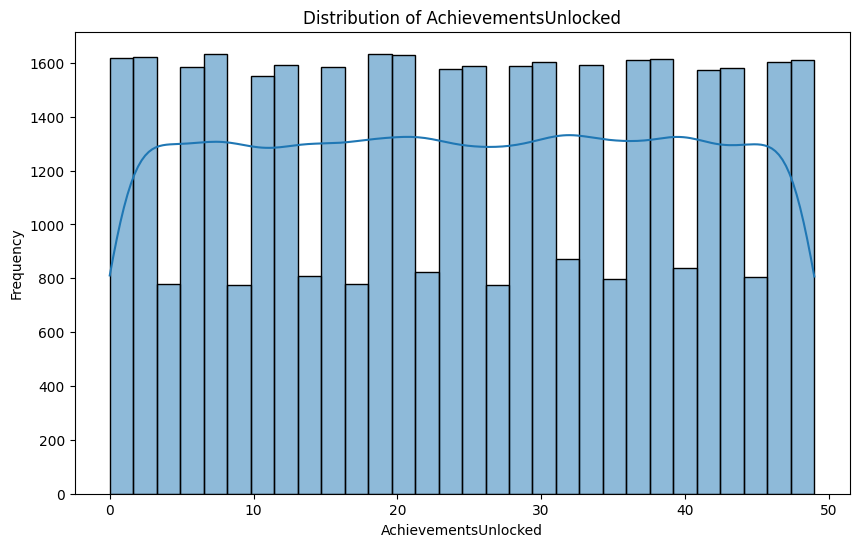

In [17]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# **Correlation Matrix Heatmap**

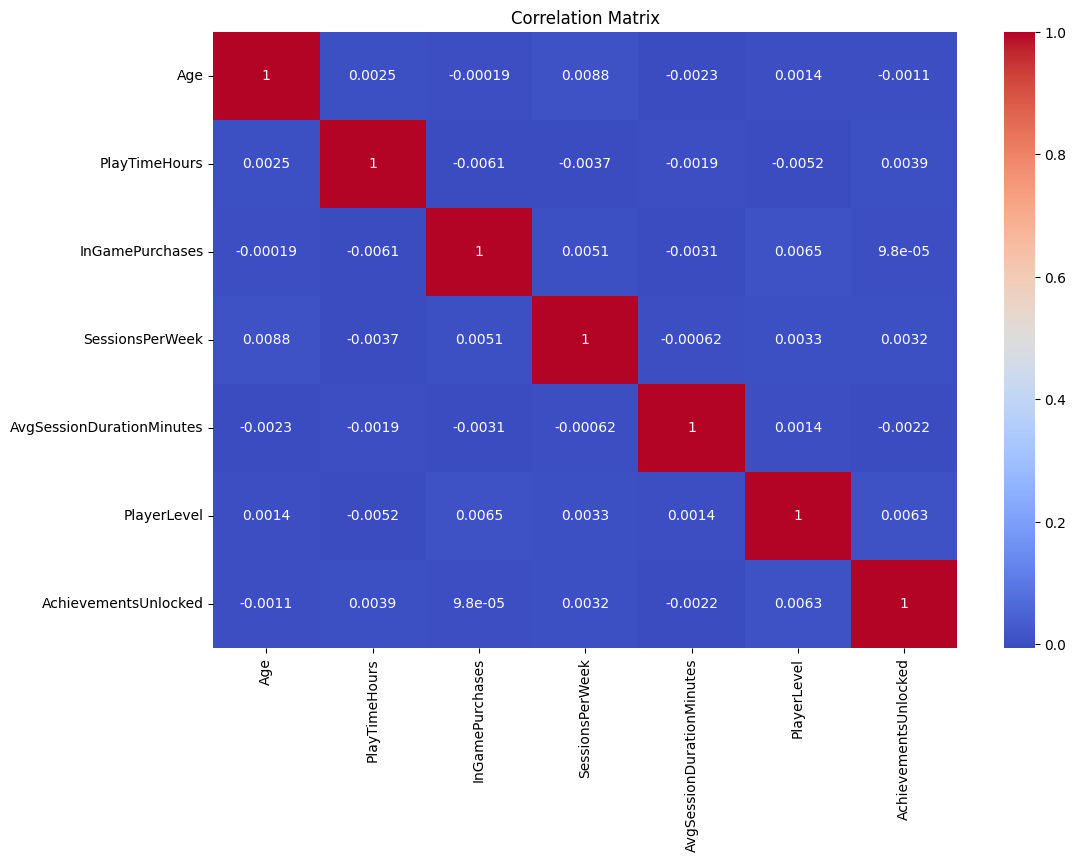

In [18]:
# Select only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation analysis
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Encoding Object Categorical Features:

Encoded Game diffuclty and EngagementLevel using label encoder as they're ordinal, but else were encoded using one hot encoding as theyre nominal.

In [19]:
game_difficulty_mapping = {'Easy': 0, 'Medium': 1, 'Hard': 2}
engagement_level_mapping = {'Medium': 1, 'High': 2, 'Low': 0}
df['GameDifficulty'] = df['GameDifficulty'].map(game_difficulty_mapping)
df['EngagementLevel'] = df['EngagementLevel'].map(engagement_level_mapping)
# Apply One-Hot Encoding to Gender, Location, GameGenre
df = pd.get_dummies(df, columns=['Gender', 'Location', 'GameGenre'],drop_first=True,dtype=int)

In [20]:
df.head()

Age  PlayTimeHours  InGamePurchases  GameDifficulty  SessionsPerWeek  \
0   43      16.271119                0               1                6   
1   29       5.525961                0               1                5   
2   22       8.223755                0               0               16   
3   35       5.265351                1               0                9   
4   33      15.531945                0               1                2   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                        108           79                    25   
1                        144           11                    10   
2                        142           35                    41   
3                         85           57                    47   
4                        131           95                    37   

   EngagementLevel  Gender_Male  Location_Europe  Location_Other  \
0                1            1                0               1   
1                1            0                0               0   
2                2            0                0               0   
3                1            1                0               0   
4                1            1                1               0   

   Location_USA  GameGenre_RPG  GameGenre_Simulation  GameGenre_Sports  \
0             0              0                     0                 0   
1             1              0                     0                 0   
2             1              0                     0                 1   
3             1              0                     0                 0   
4             0              0                     0                 0   

   GameGenre_Strategy  
0                   1  
1                   1  
2                   0  
3                   0  
4                   0

New Feature: Avg Sessions Duration per week

In [21]:
df['TotalSessionDurationPerWeek'] = df['SessionsPerWeek'] * df['AvgSessionDurationMinutes']

In [22]:
list = numeric_df.columns.to_list()

In [23]:
list.append('TotalSessionDurationPerWeek')

In [24]:
list

['Age',
 'PlayTimeHours',
 'InGamePurchases',
 'SessionsPerWeek',
 'AvgSessionDurationMinutes',
 'PlayerLevel',
 'AchievementsUnlocked',
 'TotalSessionDurationPerWeek']

In [25]:
df_sel = df[list]

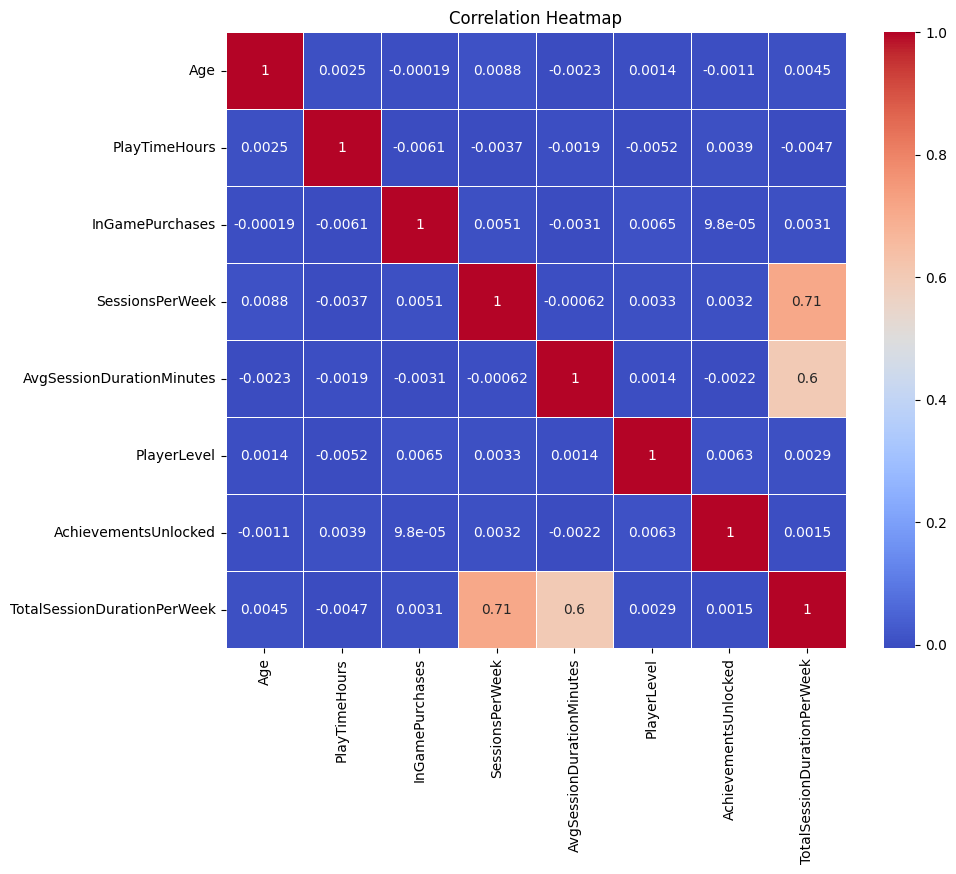

In [26]:
# Calculate the correlation matrix
correlation_matrix = df_sel.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Splitting into x,y**

In [27]:
X = df.drop('EngagementLevel', axis=1)
y = df['EngagementLevel']

# **60% training, 20% validation, 20% test**

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=101, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101, stratify=y_temp)

In [29]:
from imblearn.combine import SMOTETomek

# **Data was imbalanced, solved by SMOTE-TOMEK**

In [30]:
smote_tomek = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

# **Scaling Numerical Features**

In [31]:
columns_to_scale = ['AchievementsUnlocked','PlayerLevel','AvgSessionDurationMinutes','SessionsPerWeek','PlayTimeHours','Age']
scaler = StandardScaler()
# Apply scaling on training data
X_train_res.loc[:, columns_to_scale] = scaler.fit_transform(X_train_res[columns_to_scale])
# Apply the same scaling on validation and testing data
X_val.loc[:, columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test.loc[:, columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# **Parameters to validate using RandomizedCV**

In [32]:
param_distributions = {
    'Logistic Regression': {'C': np.logspace(-4, 4, 20)},
    'Random Forest': {'n_estimators': np.arange(10, 200, 10), 'max_depth': np.arange(1, 20, 2)},
    'K-Nearest Neighbors': {'n_neighbors': np.arange(1, 31, 2)},
    'Decision Tree': {'max_depth': np.arange(1, 20, 2)},
    'Naive Bayes': {},  # No hyperparameters to tune for GaussianNB
    'Gradient Boosting': {'n_estimators': np.arange(10, 200, 10), 'learning_rate': np.logspace(-4, 0, 20)},
    'AdaBoost': {'n_estimators': np.arange(10, 200, 10)},
    'XGBoost': {'n_estimators': np.arange(10, 200, 10), 'learning_rate': np.logspace(-4, 0, 20)}
}

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

# **Feature Selection using PCA to retain 95% of the variance**

In [34]:
# Apply PCA after scaling
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_res_pca = pca.fit_transform(X_train_res)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [35]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')  # Set eval_metric to avoid warnings
}

In [36]:
best_model = None
best_accuracy = 0
best_model_name = ""

In [42]:
# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    # Custom labels for the axes
    labels = ['Low', 'Medium', 'High']
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, annot_kws={"size": 16},
                xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.show()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# **Used to get highest model with validation Accuracy**

In [39]:
for model_name, model in classifiers.items():
    if param_distributions[model_name]:
        # Setup RandomizedSearchCV using the training set
        search = RandomizedSearchCV(model, param_distributions[model_name], n_iter=50, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
        search.fit(X_train_res_pca, y_train_res)  # Use resampled PCA-transformed training data
        best_params = search.best_params_
        current_model = search.best_estimator_

        # Evaluate on the validation set using the best model found
        y_val_pred = current_model.predict(X_val_pca)  # Ensure that PCA transformation is applied to X_val similar to X_train_res_pca
        val_accuracy = accuracy_score(y_val, y_val_pred)

        # Compare to find the best model based on validation set performance
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model_name = model_name
            best_model = current_model

    else:
        # If no hyperparameters to tune, use the default model
        current_model = model.fit(X_train_res_pca, y_train_res)
        best_params = "Default parameters"
        y_val_pred = current_model.predict(X_val_pca)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_model_name = model_name
            best_model = current_model

    print(f'--- {model_name} ---')
    print('Best Parameters:', best_params)
    print('Validation Accuracy:', val_accuracy)

--- Logistic Regression ---
Best Parameters: {'C': np.float64(0.0001)}
Validation Accuracy: 0.8267765705008118
--- Random Forest ---
Best Parameters: {'n_estimators': np.int64(150), 'max_depth': np.int64(11)}
Validation Accuracy: 0.8894717122517797
--- K-Nearest Neighbors ---
Best Parameters: {'n_neighbors': np.int64(13)}
Validation Accuracy: 0.8852254277507181
--- Decision Tree ---
Best Parameters: {'max_depth': np.int64(7)}
Validation Accuracy: 0.8848507555888597
--- Naive Bayes ---
Best Parameters: Default parameters
Validation Accuracy: 0.7781940801798426
--- Gradient Boosting ---
Best Parameters: {'n_estimators': np.int64(80), 'learning_rate': np.float64(0.14384498882876628)}
Validation Accuracy: 0.8853503184713376
--- AdaBoost ---
Best Parameters: {'n_estimators': np.int64(10)}
Validation Accuracy: 0.8865992256775321
--- XGBoost ---
Best Parameters: {'n_estimators': np.int64(10), 'learning_rate': np.float64(0.08858667904100823)}
Validation Accuracy: 0.8837267391032846


# **Predict the test set using best model performance with validation set**

In [40]:
# Final evaluation on the test set with the best model
y_test_pred = best_model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"The best model is {best_model_name} with a validation accuracy of {best_accuracy}.")
print('Test Accuracy:', test_accuracy)

The best model is Random Forest with a validation accuracy of 0.8894717122517797.
Test Accuracy: 0.8801049082053204


# **Classification Report and Confusion Matrix**

Accuracy: 0.8801049082053204
Precision: 0.8823770574171382
Recall: 0.8801049082053204
F1 Score: 0.8805832734681577
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      2065
           1       0.91      0.88      0.89      3875
           2       0.90      0.87      0.89      2067

    accuracy                           0.88      8007
   macro avg       0.88      0.88      0.88      8007
weighted avg       0.88      0.88      0.88      8007



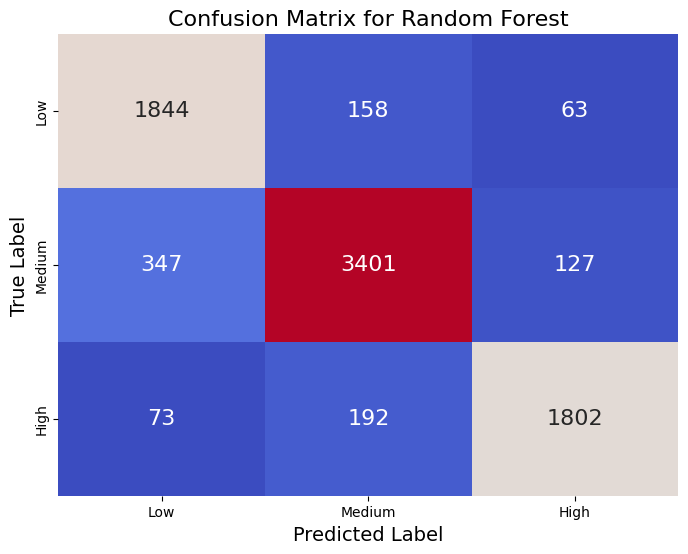

In [43]:
# Detailed metrics and plots
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
classification_rep = classification_report(y_test, y_test_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)
plot_confusion_matrix(y_test, y_test_pred, best_model_name)